In [ ]:
import gdown

# Google Drive file ID extracted from your link
file_id = "1lMexhv7QUsaFMgpj_J4WOG36Ew70bHhE"
url = f"https://drive.google.com/uc?id={file_id}"

output = "data.csv"
gdown.download(url, output, quiet=False)

import pandas as pd
df = pd.read_csv("data.csv")
print(df.head())
df = df.drop(columns=["id", "Unnamed: 32"], errors="ignore")

y = df["diagnosis"].map({"M": 1, "B": 0})
X = df.drop(columns=["diagnosis"])


Downloading...
From: https://drive.google.com/uc?id=1lMexhv7QUsaFMgpj_J4WOG36Ew70bHhE
To: /content/data.csv
100%|██████████| 125k/125k [00:00<00:00, 52.5MB/s]

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [ ]:
RANDOM_STATE = 73
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.4,
    random_state=RANDOM_STATE,
    stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=RANDOM_STATE,
    stratify=y_temp
)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=RANDOM_STATE)


X_all_scaled = scaler.fit_transform(X)
X_all_pca = pca.fit_transform(X_all_scaled)

pca_df = pd.DataFrame({
    "PC1": X_all_pca[:, 0],
    "PC2": X_all_pca[:, 1],
    "label": y.values
})
pca_df.head()


,PC1,PC2,label
0,9.192837,1.948583,1
1,2.387802,-3.768172,1
2,5.733896,-1.075174,1
3,7.122953,10.275589,1
4,3.935302,-1.948072,1


from matplotlib import pyplot as plt
_df_0['PC1'].plot(kind='hist', bins=20, title='PC1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['PC2'].plot(kind='hist', bins=20, title='PC2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='PC1', y='PC2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['label']
  ys = series['PC1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('label', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('label')
_ = plt.ylabel('PC1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['label']
  ys = series['PC2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('label', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('label')
_ = plt.ylabel('PC2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['label']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'label'}, axis=1)
              .sort_values('label', ascending=True))
  xs = counted['label']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('label', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('label')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['PC1'].plot(kind='line', figsize=(8, 4), title='PC1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['PC2'].plot(kind='line', figsize=(8, 4), title='PC2')
plt.gca().spines[['top', 'right']].set_visible(False)

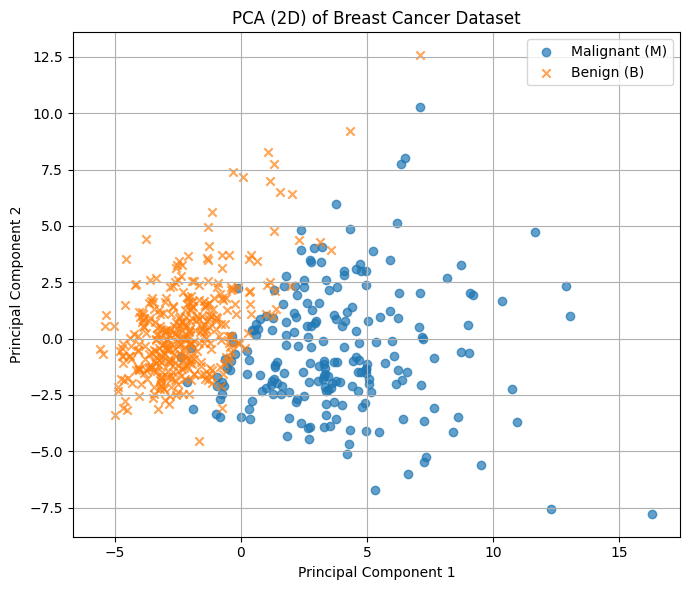

In [ ]:
import matplotlib.pyplot as plt

malignant = pca_df[pca_df["label"] == 1]
benign    = pca_df[pca_df["label"] == 0]

plt.figure(figsize=(7, 6))

plt.scatter(
    malignant["PC1"], malignant["PC2"],
    alpha=0.7, label="Malignant (M)", marker="o"
)
plt.scatter(
    benign["PC1"], benign["PC2"],
    alpha=0.7, label="Benign (B)", marker="x"
)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA (2D) of Breast Cancer Dataset")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)
C_base = 1.0

svm_lin = SVC(
    kernel='linear',
    C=C_base,
    random_state=RANDOM_STATE
)
svm_lin.fit(X_train_scaled, y_train)

w = svm_lin.coef_.ravel()
w_norm = np.linalg.norm(w)
margin = 1.0 / w_norm

print("Norm of w (||w||):", w_norm)
print("Geometric margin (1 / ||w||):", margin)

def evaluate_split(name, X_split, y_split, model):
    y_pred = model.predict(X_split)
    scores = model.decision_function(X_split)

    acc  = accuracy_score(y_split, y_pred)
    prec = precision_score(y_split, y_pred, pos_label=1)
    rec  = recall_score(y_split, y_pred, pos_label=1)
    f1   = f1_score(y_split, y_pred, pos_label=1)
    auc  = roc_auc_score(y_split, scores)

    print(f"\n[{name}]")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    print(f"ROC-AUC  : {auc:.4f}")

evaluate_split("Train",       X_train_scaled, y_train, svm_lin)
evaluate_split("Validation",  X_val_scaled,   y_val,   svm_lin)
evaluate_split("Test",        X_test_scaled,  y_test,  svm_lin)

print("\nNumber of support vectors per class:", svm_lin.n_support_)
print("Total number of support vectors    :", svm_lin.support_.shape[0])


Norm of w (||w||): 3.1131097947229844
Geometric margin (1 / ||w||): 0.3212222073551966

[Train]
Accuracy : 0.9912
Precision: 1.0000
Recall   : 0.9764
F1-score : 0.9880
ROC-AUC  : 0.9990

[Validation]
Accuracy : 0.9474
Precision: 0.9302
Recall   : 0.9302
F1-score : 0.9302
ROC-AUC  : 0.9745

[Test]
Accuracy : 0.9474
Precision: 0.9737
Recall   : 0.8810
F1-score : 0.9250
ROC-AUC  : 0.9881

Number of support vectors per class: [13 13]
Total number of support vectors    : 26


In [ ]:
C_values = [0.01, 0.1, 1, 10, 100]

results = []

for C in C_values:
    model = SVC(
        kernel='linear',
        C=C,
        random_state=RANDOM_STATE
    )
    model.fit(X_train_scaled, y_train)


    y_val_pred = model.predict(X_val_scaled)
    val_scores = model.decision_function(X_val_scaled)

    acc_val  = accuracy_score(y_val, y_val_pred)
    prec_val = precision_score(y_val, y_val_pred, pos_label=1)
    rec_val  = recall_score(y_val, y_val_pred, pos_label=1)
    f1_val   = f1_score(y_val, y_val_pred, pos_label=1)
    auc_val  = roc_auc_score(y_val, val_scores)


    y_test_pred = model.predict(X_test_scaled)
    test_scores = model.decision_function(X_test_scaled)

    acc_test  = accuracy_score(y_test, y_test_pred)
    prec_test = precision_score(y_test, y_test_pred, pos_label=1)
    rec_test  = recall_score(y_test, y_test_pred, pos_label=1)
    f1_test   = f1_score(y_test, y_test_pred, pos_label=1)
    auc_test  = roc_auc_score(y_test, test_scores)


    n_sv_per_class = model.n_support_
    total_sv = model.support_.shape[0]

    results.append({
        "C": C,
        "Val_Accuracy":  acc_val,
        "Val_Precision": prec_val,
        "Val_Recall":    rec_val,
        "Val_F1":        f1_val,
        "Val_ROC_AUC":   auc_val,
        "Test_Accuracy":  acc_test,
        "Test_Precision": prec_test,
        "Test_Recall":    rec_test,
        "Test_F1":        f1_test,
        "Test_ROC_AUC":   auc_test,
        "SV_Class_0":     n_sv_per_class[0],
        "SV_Class_1":     n_sv_per_class[1],
        "SV_Total":       total_sv
    })

results_df = pd.DataFrame(results)
results_df
results_df.sort_values("C")
pd.set_option("display.precision", 4)
results_df

,C,Val_Accuracy,Val_Precision,Val_Recall,Val_F1,Val_ROC_AUC,Test_Accuracy,Test_Precision,Test_Recall,Test_F1,Test_ROC_AUC,SV_Class_0,SV_Class_1,SV_Total
0,0.01,0.9561,0.9750,0.9070,0.9398,0.9951,0.9474,1.0000,0.8571,0.9231,0.9937,40,41,81
1,0.10,0.9649,0.9535,0.9535,0.9535,0.9964,0.9561,1.0000,0.8810,0.9367,0.9970,20,20,40
2,1.00,0.9474,0.9302,0.9302,0.9302,0.9745,0.9474,0.9737,0.8810,0.9250,0.9881,13,13,26
3,10.00,0.9298,0.8723,0.9535,0.9111,0.9712,0.9298,0.9250,0.8810,0.9024,0.9623,13,6,19
4,100.00,0.9298,0.8723,0.9535,0.9111,0.9708,0.9386,0.9487,0.8810,0.9136,0.9630,11,6,17


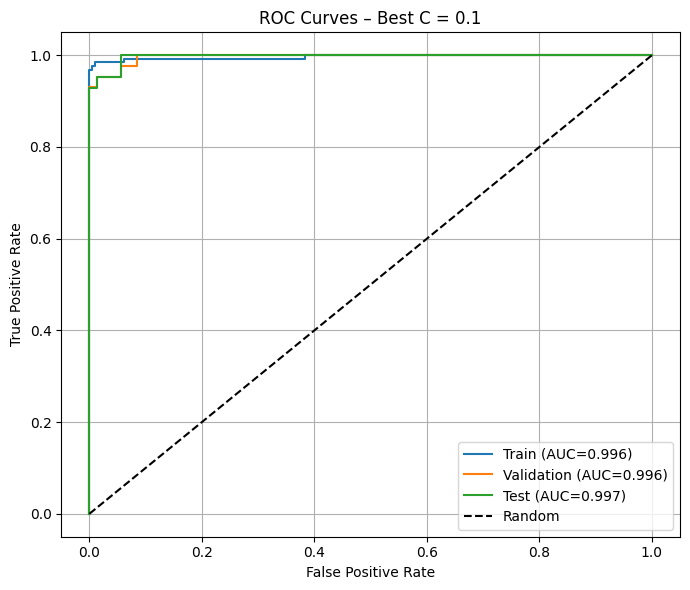

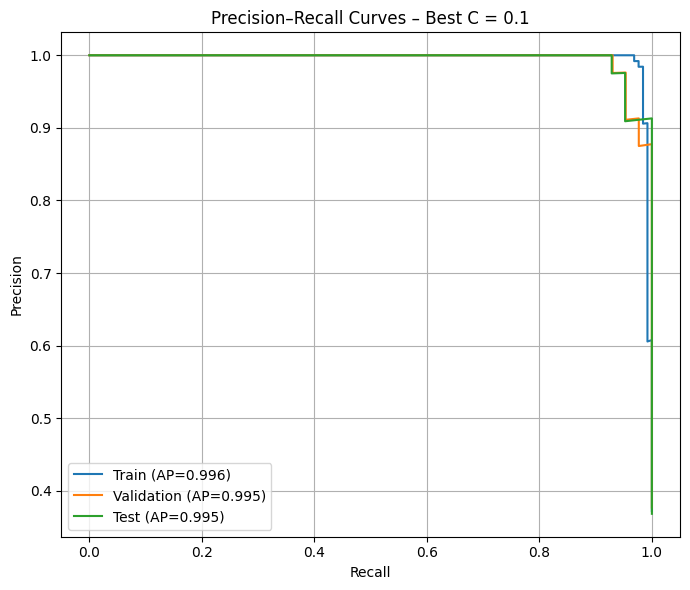

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_curve, auc,
    precision_recall_curve,
    average_precision_score
)
from sklearn.svm import SVC

BEST_C = 0.1

svm_best = SVC(
    kernel='linear',
    C=BEST_C,
    random_state=73
)
svm_best.fit(X_train_scaled, y_train)


def plot_roc(ax, X, y, label):
    scores = svm_best.decision_function(X)
    fpr, tpr, _ = roc_curve(y, scores)
    auc_val = auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f"{label} (AUC={auc_val:.3f})")


def plot_pr(ax, X, y, label):
    scores = svm_best.decision_function(X)
    prec, rec, _ = precision_recall_curve(y, scores)
    ap = average_precision_score(y, scores)
    ax.plot(rec, prec, label=f"{label} (AP={ap:.3f})")


plt.figure(figsize=(7, 6))
ax = plt.gca()

plot_roc(ax, X_train_scaled, y_train, "Train")
plot_roc(ax, X_val_scaled,   y_val,   "Validation")
plot_roc(ax, X_test_scaled,  y_test,  "Test")

plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – Best C = 0.1")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 6))
ax = plt.gca()

plot_pr(ax, X_train_scaled, y_train, "Train")
plot_pr(ax, X_val_scaled,   y_val,   "Validation")
plot_pr(ax, X_test_scaled,  y_test,  "Test")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curves – Best C = 0.1")
plt.legend(loc="lower left")
plt.grid(True)
plt.tight_layout()
plt.show()
